<a href="https://colab.research.google.com/github/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python%20/PIPGES/Aprendizado_Supervisionado_Classificacao_bin%C3%A1ria_PIPGES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EST5534 Aprendizado de Máquina Estatístico


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Programa

- O modelo de regressão logística
- Qualidade da classificação



## O modelo de regressão logística



#### Modelo Binomial: para modelar proporções


Se $Y^\star$ é a proporção de sucessos em $n$ ensaios independentes de Bernoulli, cada um com probabilidade de sucesso $\mu$, então $nY^\star\sim B(n,\mu)$, com densidade dada por

$$\begin{array}{lll}f(y)  &=& P(Y=y) = \left(\begin{array}{c} n\\ ny^\star\end{array}\right)\mu ^{ny^\star}(1-\mu)^{n-ny^\star} = \\ &=&\exp\left\{\log  \left(\begin{array}{c} n\\ ny^\star\end{array}\right) + ny^\star \log\left(\displaystyle\frac{\mu}{1-\mu} + n\log(1-\mu)\right)\right\},\end{array}  $$

em que $\mu>0$, $y^\star<1$. Nesse caso, $\phi =n$, $\theta = \log\displaystyle\left(\frac{\mu}{1-\mu}\right)$, $b(\theta) = \log(1+e^\theta)$, e $c(y^\star, \phi) = \log  \left(\begin{array}{c} \phi\\ \phi y^\star\end{array}\right)$. Segue que $V(\mu) = \mu(1-\mu)$.



### O modelo de regressão logística

Um dos modelos lineares mais utilizados é o modelo de regressão logística.

Neste modelo, consideramos


$Y_i = \left\{\begin{array}{l}1, \mbox{ se o indivíduo i possui determinada característica}\\ 0, \mbox{ caso contrário}\end{array}\right.$

Supondo que $P(Y_i|X_i) = \pi(X_i)$ e que

$$\log\left\{\displaystyle\frac{\pi(x)}{1-\pi(x)}\right\} = \alpha+\beta x$$

e queremos estimar os parâmetros $\alpha$ e $\beta$ para compreender como $X_i$ e $Y_i$ estão associados.



Suponha que $X_i=1$ indique que o indivíduo $i$ possui um fator de risco para uma determinada doença (indicada por $Y_i=1)$ e foram observados $n_1$ indivíduos com a presença deste fator, e $n_2$ indivíduos sem a presença deste fator ($X_i=0$).


Para os indivíduos que possuiam o fator, a **chance** de desenvolvimento da doença fica

$$\displaystyle\frac{\pi(1)}{1-\pi(1)} = e^{\alpha + \beta},$$

enquanto que a **chance** de desenvolvimento da doença no indivíduo com ausência do fator é

$$\displaystyle\frac{\pi(0)}{1-\pi(0)} = e^{\alpha }.$$


A razão de chances nesse caso fica

$$\psi =  \displaystyle\frac{\pi(1)/(1-\pi(1))}{\pi(0)/(1-\pi(0))} = e^\beta.$$



### Regressão logística múltipla


O modelo de regressão logística pode ser estendido para incluir $p$ variáveis preditoras:

$Y_i = \left\{\begin{array}{l}1, \mbox{ se o indivíduo i possui determinada característica}\\ 0, \mbox{ caso contrário}\end{array}\right.$

Supondo que $P(Y_i|X_i) = \pi(X_i)$ e que

$$\log\left\{\displaystyle\frac{\pi(x)}{1-\pi(x)}\right\} = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \ldots + \beta_p x_{p}.$$


# A qualidade da classificação

- Taxa observada de erros
- Acurácia
- Matriz de confusão
- Curva ROC
- AUC



## Dados com resposta binomial

Referência sugerida: https://www.statsmodels.org/devel/examples/notebooks/generated/glm.html


## Aplicação

Considere os dados do arquivo dados_banco.csv. Estão disponíveis as variáveis:

- Cliente: Identificador do cliente.
- Sexo: Feminino (F) ou Masculino (M)
- Idade: Idade do cliente, em anos completos.
- Empresa: Tipo da empresa em que trabalha: Pública, Privada ou Autônomo
- Salário: Salário declarado pelo cliente na abertura da conta, em reais.
- Saldo_cc: Saldo em conta corrente, em reais.
- Saldo_poupança: Saldo em poupança, em reais.
- Saldo_investimento: Saldo em investimentos, em reais.
- Devedor_cartao: Valor em atraso no cartão de crédito, em reais.
- Inadimplente: Se o cliente é considerado inadimplente atualmente (1) ou não (0), de acordo com critérios preestabelecidos.

In [53]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In [54]:
import pandas as pd
import statsmodels.api as sm


In [55]:
# Dados banco - Leitura dos dados
dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Estatistica-Ciencia-Dados/main/Data/dados_banco.csv', index_col=0, decimal='.')

dados

,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
Cliente,,,,,,,,,
75928,M,32,Privada,5719.00,933.79,0.0,0.0,6023.68,0
52921,F,28,Privada,5064.00,628.37,0.0,0.0,1578.24,0
8387,F,24,Autônomo,4739.00,889.18,0.0,0.0,2578.70,0
54522,M,30,Pública,5215.00,1141.47,0.0,0.0,4348.96,0
45397,M,30,Autônomo,5215.56,520.70,0.0,0.0,1516.78,1
...,...,...,...,...,...,...,...,...,...
33487,F,31,Pública,5016.00,498.96,0.0,0.0,1263.34,0
71360,M,29,Pública,5329.00,1142.82,0.0,0.0,5613.71,0
92455,M,34,Privada,5581.00,885.34,0.0,0.0,1199.22,0


In [56]:
dados['Inadimplente'].value_counts()

0    7539
1    2461
Name: Inadimplente, dtype: int64

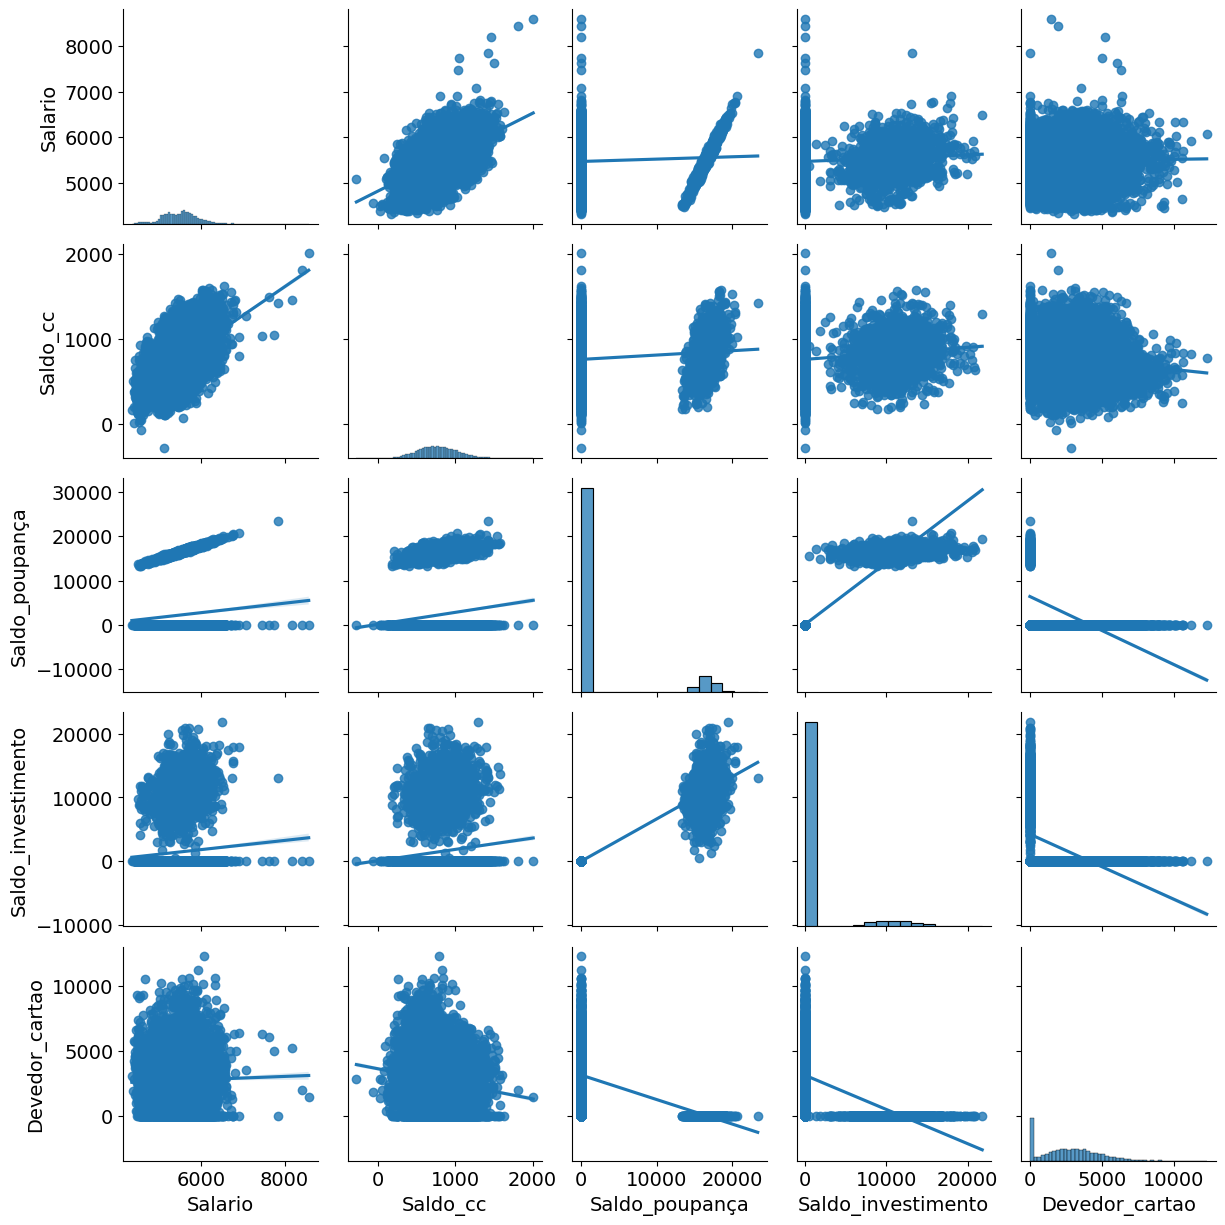

In [57]:
sns.pairplot(dados[['Salario','Saldo_cc', 'Saldo_poupança', 'Saldo_investimento', 'Devedor_cartao']], kind='reg')

In [58]:
# vamos considerar as variáveis Salario e Devedor_cartão, somente os clientes que possuem algum saldo devedor no cartão
# Considerando só os clientes que tem saldo devedor no cartão diferente de zero

dados = dados[dados['Devedor_cartao']!=0]

len(dados)



8323

**Divisão da base em treino e teste**

In [59]:
dados_treino, dados_teste = train_test_split(dados,train_size = 0.8,random_state=3)

In [60]:
dados['Devedor_cartao']

Cliente
75928    6023.68
52921    1578.24
8387     2578.70
54522    4348.96
45397    1516.78
          ...   
33487    1263.34
71360    5613.71
92455    1199.22
61296    1152.97
52862    4684.66
Name: Devedor_cartao, Length: 8323, dtype: float64

### Ajuste de modelo de regressão logística com as 2 preditores

In [61]:
### Ajustando um MLG com resposta binária, iniciando com 4 preditoras

preditoras = dados_treino[['Salario', 'Devedor_cartao']]
resposta = dados_treino['Inadimplente']


In [62]:
preditoras.head()

,Salario,Devedor_cartao
Cliente,,
66105,5493.88,7421.83
20604,6220.00,711.69
80002,5090.00,2990.17
2762,5888.82,5848.05
47455,5696.74,3140.52


In [63]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                 6658
Model:                            GLM   Df Residuals:                     6656
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3490.4
Date:                Tue, 12 Sep 2023   Deviance:                       6980.9
Time:                        02:06:21   Pearson chi2:                 7.00e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1462
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Salario           -0.0005   1.39e-05    -36.

In [64]:
X_teste = dados_teste[['Salario', 'Devedor_cartao']]
y_teste = dados_teste['Inadimplente']

y_predito = res.predict(X_teste)

In [65]:
predito_01 = np.empty(len(res.predict(X_teste)))

for i in range(0,len(res.predict(X_teste)+1)):
  if (res.predict(X_teste).iloc[i]>0.5):
    predito_01[i] = 1
  else:
    predito_01[i] = 0


In [66]:
predito_01

array([0., 0., 0., ..., 1., 0., 0.])

In [67]:
dados_treino.loc[:,'const']  = 1
dados_teste.loc[:,'const']  = 1

In [68]:
dados_treino.head()

,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,const
Cliente,,,,,,,,,,
66105,M,34,Privada,5493.88,484.81,0.0,0.0,7421.83,1,1
20604,M,36,Privada,6220.00,662.72,0.0,0.0,711.69,0,1
80002,F,29,Privada,5090.00,906.09,0.0,0.0,2990.17,0,1
2762,M,35,Privada,5888.82,519.94,0.0,0.0,5848.05,1,1
47455,M,34,Privada,5696.74,796.16,0.0,0.0,3140.52,1,1


In [69]:
preditoras = dados_treino[['const','Salario', 'Devedor_cartao']]
resposta = dados_treino[['Inadimplente']]

X_teste = dados_teste[['const','Salario', 'Devedor_cartao']]
y_teste = dados_teste[['Inadimplente']]



In [70]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

predito = res.predict(X_teste)

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                 6658
Model:                            GLM   Df Residuals:                     6655
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3461.8
Date:                Tue, 12 Sep 2023   Deviance:                       6923.5
Time:                        02:06:21   Pearson chi2:                 7.08e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1535
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1571      0.420      7.

In [71]:
predito_01 = np.empty(len(res.predict(X_teste)))

for i in range(0,len(res.predict(X_teste)+1)):
  if (res.predict(X_teste).iloc[i]>0.5):
    predito_01[i] = 1
  else:
    predito_01[i] = 0

In [72]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

y_predito = predito_01

confusion_matrix(y_teste,y_predito)

dados_teste['y_teste'] = dados_teste['Inadimplente']
dados_teste['y_predito'] = y_predito
dados_teste

,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,const,y_teste,y_predito
Cliente,,,,,,,,,,,,
54342,M,34,Privada,5607.00,734.90,0.0,0.0,2801.94,0,1,0,0.0
76636,F,30,Privada,5429.00,766.01,0.0,0.0,3167.39,0,1,0,0.0
46875,F,35,Autônomo,5706.00,925.54,0.0,0.0,4749.06,0,1,0,0.0
73952,F,31,Autônomo,5173.00,820.84,0.0,0.0,2261.41,0,1,0,0.0
18722,M,35,Privada,5778.00,873.44,0.0,0.0,4023.62,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70695,F,30,Pública,5218.00,606.57,0.0,0.0,2337.82,0,1,0,0.0
56036,M,28,Autônomo,4985.26,594.81,0.0,0.0,1360.51,1,1,1,0.0
73178,M,35,Privada,5586.98,904.94,0.0,0.0,5497.64,1,1,1,1.0


In [73]:
pd.crosstab(dados_teste['y_teste'], dados_teste['y_predito'], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0,1084,59,1143
1,347,175,522
All,1431,234,1665


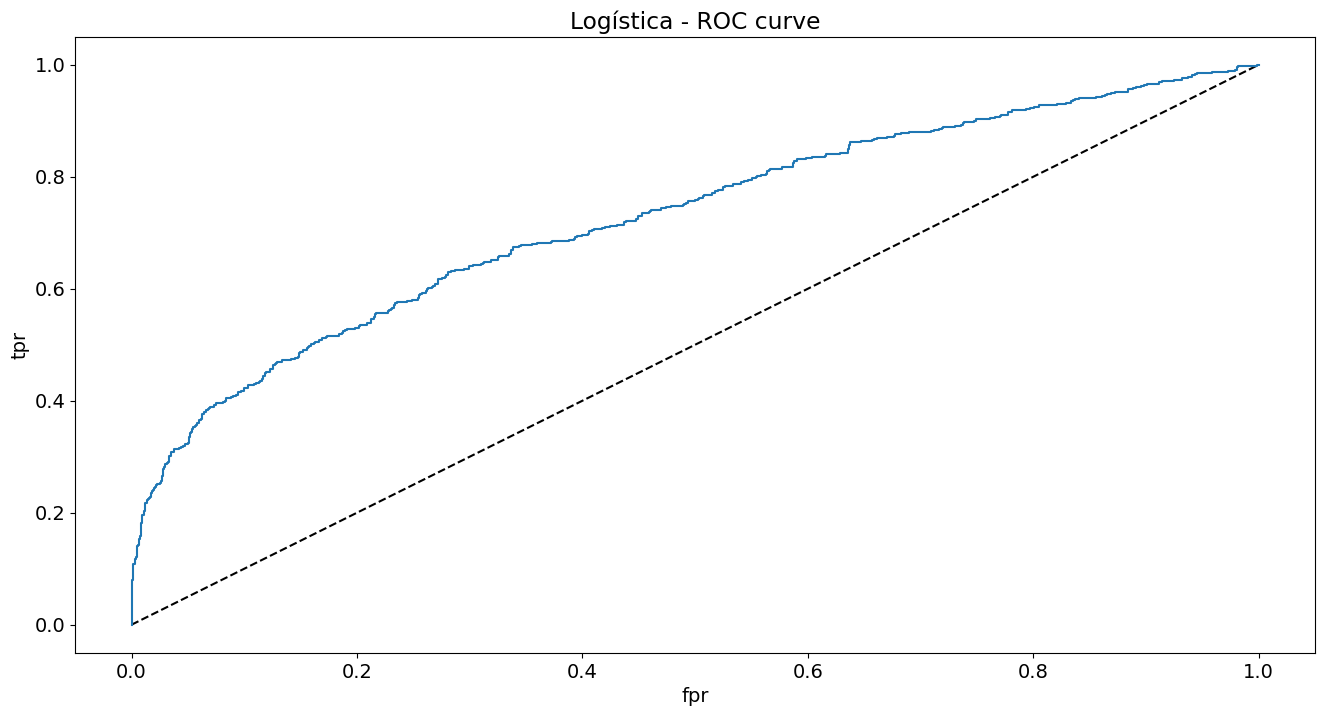

In [74]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_teste, predito)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistica')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logística - ROC curve')
plt.show()

## Métricas de desempenho para classificação binária

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# Acurácia
acc = accuracy_score(y_teste, y_predito)

# Precisão para a classe 1
precision = precision_score(y_teste, y_predito, pos_label=1)

# Recall para a classe 1
recall = recall_score(y_teste, y_predito, pos_label=1)

# F1-score para a classe 1
f1 = f1_score(y_teste, y_predito, pos_label=1)


print('Métricas de desempenho para aprendizado supervisionado em classificação binária')
print("\nAcurácia:", np.round(acc,3))
print("\nPrecisão (para a classe 1):", np.round(precision,3))
print("Recall (para a classe 1):", np.round(recall,3))
print("F1-score (para a classe 1):", np.round(f1,3))

# Precisão para a classe 0
precision = precision_score(y_teste, y_predito, pos_label=0)

# Recall para a classe 0
recall = recall_score(y_teste, y_predito, pos_label=0)

# F1-score para a classe 0
f1 = f1_score(y_teste, y_predito, pos_label=0)

print("\nPrecisão (para a classe 0):", np.round(precision,3))
print("Recall (para a classe 0):", np.round(recall,3))
print("F1-score (para a classe 0):", np.round(f1,3))

Métricas de desempenho para aprendizado supervisionado em classificação binária

Acurácia: 0.756

Precisão (para a classe 1): 0.748
Recall (para a classe 1): 0.335
F1-score (para a classe 1): 0.463

Precisão (para a classe 0): 0.758
Recall (para a classe 0): 0.948
F1-score (para a classe 0): 0.842
